In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Married'].fillna('Yes', inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [10]:
df.drop(columns=['Loan_ID','Gender','Self_Employed'],inplace=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

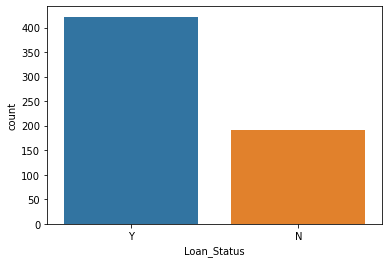

In [11]:
sns.countplot(x="Loan_Status",data=df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    object 
 9   Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 48.1+ KB


In [13]:
df['LoanAmount'].max()

700.0

C:\Users\Rvs Pavan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 800.0)

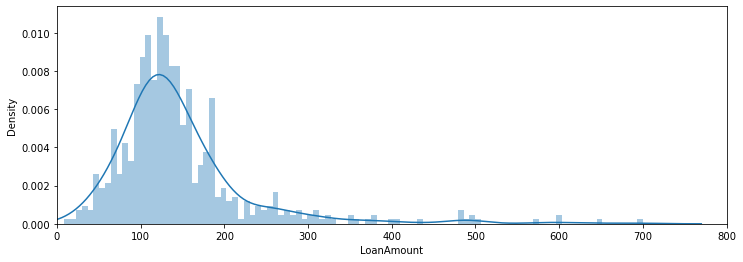

In [14]:
plt.figure(figsize=(12,4))
sns.distplot(df['LoanAmount'],kde=True,bins=100)
plt.xlim(0,800)

In [15]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

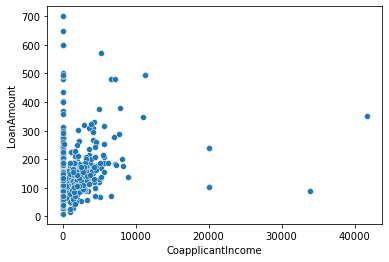

In [16]:
sns.scatterplot(x='ApplicantIncome'and'CoapplicantIncome',y='LoanAmount',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

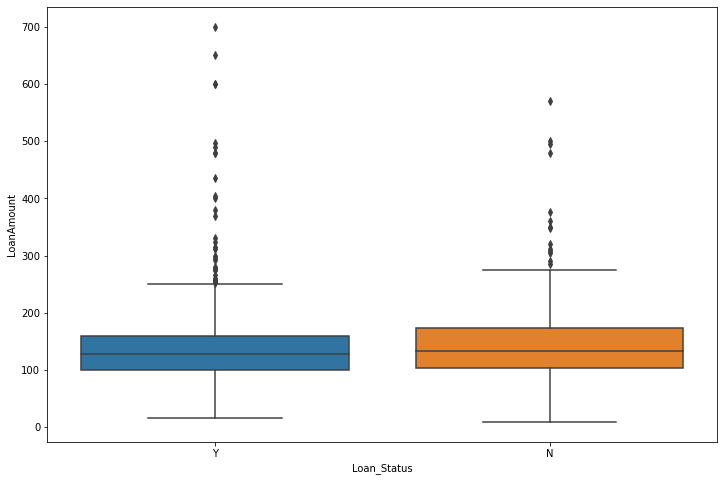

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Loan_Status",y="LoanAmount",data=df)

In [18]:
df.groupby('Loan_Status')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,192.0,150.945488,83.361163,9.0,102.75,133.5,173.0,570.0
Y,422.0,144.349606,84.361109,17.0,100.00,128.0,160.0,700.0


In [19]:
x=df.drop('Loan_Status',axis=1)

In [20]:
x

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,No,0,Graduate,5849,0.0,146.412162,360.0,1.0,Urban
1,Yes,1,Graduate,4583,1508.0,128.000000,360.0,1.0,Rural
2,Yes,0,Graduate,3000,0.0,66.000000,360.0,1.0,Urban
3,Yes,0,Not Graduate,2583,2358.0,120.000000,360.0,1.0,Urban
4,No,0,Graduate,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,2900,0.0,71.000000,360.0,1.0,Rural
610,Yes,3+,Graduate,4106,0.0,40.000000,180.0,1.0,Rural
611,Yes,1,Graduate,8072,240.0,253.000000,360.0,1.0,Urban
612,Yes,2,Graduate,7583,0.0,187.000000,360.0,1.0,Urban


In [21]:
y=df['Loan_Status']

In [22]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [23]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [25]:
ct=ColumnTransformer([('oh', OneHotEncoder(),[0,1,2,8])], remainder='passthrough')

In [26]:
x=ct.fit_transform(x)

In [27]:
x

array([[  1.        ,   0.        ,   1.        , ..., 146.41216216,
        360.        ,   1.        ],
       [  0.        ,   1.        ,   0.        , ..., 128.        ,
        360.        ,   1.        ],
       [  0.        ,   1.        ,   1.        , ...,  66.        ,
        360.        ,   1.        ],
       ...,
       [  0.        ,   1.        ,   0.        , ..., 253.        ,
        360.        ,   1.        ],
       [  0.        ,   1.        ,   0.        , ..., 187.        ,
        360.        ,   1.        ],
       [  1.        ,   0.        ,   1.        , ..., 133.        ,
        360.        ,   0.        ]])

In [28]:

from sklearn.preprocessing import LabelEncoder

In [29]:
l=LabelEncoder()


In [30]:
y=l.fit_transform(y)

In [31]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [32]:
#from imblearn.under_sampling import RandomUnderSampler

In [33]:
#us=RandomUnderSampler(random_state=0)

In [34]:
#x_1,y_1=us.fit_resample(x,y)

In [35]:
#sns.countplot(x=y_1, data=df)
#plt.xlabel('class')
#plt.ylabel('Frequency')

In [36]:
#from imblearn.over_sampling import RandomOverSampler

In [37]:
#us=RandomOverSampler(random_state=0)

In [38]:
#x_,y_=us.fit_resample(x,y)

In [39]:
#sns.countplot(x=y_, data=df)
#plt.xlabel('class')
#plt.ylabel('Frequency')

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
x= scaler.fit_transform(x)

In [43]:
x

array([[ 1.37208932e+00, -1.37208932e+00,  8.83011973e-01, ...,
         3.38478577e-16,  2.79850543e-01,  4.51640451e-01],
       [-7.28815525e-01,  7.28815525e-01, -1.13248748e+00, ...,
        -2.19273315e-01,  2.79850543e-01,  4.51640451e-01],
       [-7.28815525e-01,  7.28815525e-01,  8.83011973e-01, ...,
        -9.57640999e-01,  2.79850543e-01,  4.51640451e-01],
       ...,
       [-7.28815525e-01,  7.28815525e-01, -1.13248748e+00, ...,
         1.26937121e+00,  2.79850543e-01,  4.51640451e-01],
       [-7.28815525e-01,  7.28815525e-01, -1.13248748e+00, ...,
         4.83366900e-01,  2.79850543e-01,  4.51640451e-01],
       [ 1.37208932e+00, -1.37208932e+00,  8.83011973e-01, ...,
        -1.59727534e-01,  2.79850543e-01, -2.41044061e+00]])

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
conda create -n tf tensorflow
conda activate tf

SyntaxError: invalid syntax (2259440937.py, line 1)

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [75]:
model=Sequential()

In [76]:
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [77]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=60,
          batch_size=256,
          validation_data=(x_test, y_test), 
          )

Epoch 1/60
2/2 [==============================] - 1s 192ms/step - loss: 0.7085 - val_loss: 0.6785
Epoch 2/60
2/2 [==============================] - 0s 31ms/step - loss: 0.6852 - val_loss: 0.6559
Epoch 3/60
2/2 [==============================] - 0s 29ms/step - loss: 0.6627 - val_loss: 0.6380
Epoch 4/60
2/2 [==============================] - 0s 46ms/step - loss: 0.6533 - val_loss: 0.6230
Epoch 5/60
2/2 [==============================] - 0s 29ms/step - loss: 0.6464 - val_loss: 0.6100
Epoch 6/60
2/2 [==============================] - 0s 29ms/step - loss: 0.6257 - val_loss: 0.5987
Epoch 7/60
2/2 [==============================] - 0s 22ms/step - loss: 0.6159 - val_loss: 0.5888
Epoch 8/60
2/2 [==============================] - 0s 23ms/step - loss: 0.6235 - val_loss: 0.5796
Epoch 9/60
2/2 [==============================] - 0s 33ms/step - loss: 0.6060 - val_loss: 0.5711
Epoch 10/60
2/2 [==============================] - 0s 31ms/step - loss: 0.5931 - val_loss: 0.5629
Epoch 11/60
2/2 [===========

In [78]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

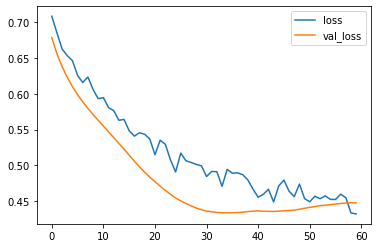

In [79]:
losses[['loss','val_loss']].plot()

In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [81]:
pro = model.predict(x_test)
pre=np.argmax(pro, axis=1)
bp=np.where(pro>0.5,1,0)

4/4 [==============================] - 0s 5ms/step


In [82]:
print(classification_report(y_test,bp))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [83]:
print(confusion_matrix(y_test,bp))

[[15 18]
 [ 2 88]]


In [84]:
accuracy_score(y_test,bp)

0.8373983739837398